In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Risky Dealer Case Study Transactions - Gerald.csv'

# Exploratory Data Analysis

# Document findings:
missing values/skewness/outliers/unexpected patterns
What insight you find and why they matter for the business?

In [4]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
pd.set_option('display.max_columns', None)

In [5]:
import pandas as pd

# Load the data
df = pd.read_csv(file_path)
df.reset_index(inplace=True)
df.rename(columns={"index": "RowID"}, inplace=True)
df.head()
# Quick look
#print(df.shape)
#df.info()
#df.describe()
#df.isnull().sum()


,RowID,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,LIGHTG,LIGHTY,LIGHTR,PSI,Arbitrated,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned
0,0,351757,441081,37055,1FAHP3M27CL374352,CAAI,FORD,13000,2012,13050,COMPACT CAR,0,0,0,0,0,0,0,0,0,1,13-07-25,1.000000,NaN,1,0.0
1,1,351757,442235,248,1G1JE6SB7D4103706,DETA,CHEVROLET,13900,2013,13600,COMPACT CAR,0,0,0,0,0,0,0,0,0,1,13-10-24,NaN,NaN,0,NaN
2,2,351757,436280,39627,1G1PG5SC4C7102274,CAAI,CHEVROLET,13800,2012,14050,MIDSIZE CAR,0,0,0,1,1,0,0,0,1,1,13-04-18,-2.666667,41,0,NaN
3,3,351757,436280,50773,1G1PG5SC5C7113820,CAAI,CHEVROLET,12900,2012,13150,MIDSIZE CAR,0,0,0,1,0,0,0,0,1,1,13-04-18,1.000000,31,0,NaN
4,4,351757,434202,54133,1GNKVGED4BJ301146,SVAA,CHEVROLET,17800,2011,18050,SUV,1,0,0,1,0,0,0,0,1,1,13-02-26,-1.400000,34,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278337 entries, 0 to 278336
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowID            278337 non-null  int64  
 1   BuyerID          278337 non-null  int64  
 2   SellerID         278337 non-null  int64  
 3   Mileage          278337 non-null  int64  
 4   VIN              278337 non-null  object 
 5   SellingLocation  278337 non-null  object 
 6   CarMake          278335 non-null  object 
 7   SalePrice        278337 non-null  int64  
 8   CarYear          278337 non-null  int64  
 9   MMR              278337 non-null  int64  
 10  JDPowersCat      277981 non-null  object 
 11  LIGHTG           278337 non-null  int64  
 12  LIGHTY           278337 non-null  int64  
 13  LIGHTR           278337 non-null  int64  
 14  PSI              278337 non-null  int64  
 15  Arbitrated       278337 non-null  int64  
 16  Salvage          278337 non-null  int6

In [7]:
df.isnull().sum()

,0
RowID,0
BuyerID,0
SellerID,0
Mileage,0
VIN,0
SellingLocation,0
CarMake,2
SalePrice,0
CarYear,0
MMR,0


In [8]:
returned_ratio=df['Returned'].sum()/df['Guaranteed'].sum()
gaurantee_ratio=df['Guaranteed'].sum()/df.shape[0]
print(f"Returned Ratio: {returned_ratio:.2%}")
print(f"Guarantee Ratio: {gaurantee_ratio:.2%}")

Returned Ratio: 21.16%
Guarantee Ratio: 7.08%


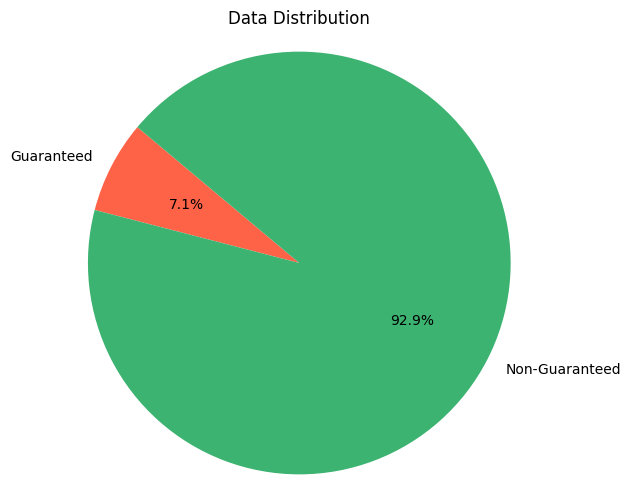

In [9]:
import matplotlib.pyplot as plt

# Your values
values = [gaurantee_ratio, 1-gaurantee_ratio]
labels = ["Guaranteed", "Non-Guaranteed"]
colors = ["tomato", "mediumseagreen"]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Data Distribution")
plt.axis("equal")  # Equal aspect ratio makes it a circle
plt.show()


In [10]:
df.describe(include='object')

,VIN,SellingLocation,CarMake,JDPowersCat,SaleDate,ConditionReport
count,278337,278337,278335,277981,278337,70005
unique,268465,67,200,9,329,51
top,4T1BK36B38U260664,THAA,FORD,SUV,13-08-29,19
freq,6,41994,47072,84831,2290,3507


In [11]:
df[df['Guaranteed']==1].describe(include='object')

,VIN,SellingLocation,CarMake,JDPowersCat,SaleDate,ConditionReport
count,19693,19693,19693,19689,19693,3825
unique,19260,53,50,9,179,44
top,WDBUF70J83A120286,SVAA,FORD,SUV,13-10-22,RG
freq,4,4324,3241,6165,423,382


In [12]:
cols = ["Mileage",'SalePrice', "CarYear",'MMR', "Autocheck_score"]
df[cols].describe().round(2)

,Mileage,SalePrice,CarYear,MMR,Autocheck_score
count,278337.00,278337.00,278337.00,278337.00,269017.00
mean,84228.54,11973.23,2007.41,11388.52,1.21
std,54879.93,9083.86,3.96,9025.53,1.74
min,1.00,1.00,1936.00,0.00,-32.60
25%,38778.00,5600.00,2005.00,4775.00,0.60
50%,79599.00,10100.00,2008.00,9700.00,1.40
75%,114088.00,16000.00,2011.00,15750.00,2.27
max,999999.00,355000.00,2014.00,172000.00,7.57


In [13]:
df[df['Guaranteed']==1][cols].describe().round(2)

,Mileage,SalePrice,CarYear,MMR,Autocheck_score
count,19693.00,19693.00,19693.00,19693.00,19217.00
mean,85717.82,11243.72,2007.65,10751.39,1.28
std,46120.19,7548.29,3.44,7537.90,1.59
min,1.00,250.00,1984.00,0.00,-25.80
25%,47024.00,6000.00,2006.00,5325.00,0.73
50%,84754.00,9800.00,2008.00,9425.00,1.42
75%,115627.00,14800.00,2011.00,14600.00,2.25
max,363570.00,163000.00,2014.00,81000.00,5.80


In [14]:
df[df['Guaranteed']==0][cols].describe().round(2)

,Mileage,SalePrice,CarYear,MMR,Autocheck_score
count,258644.00,258644.00,258644.00,258644.00,249800.00
mean,84115.15,12028.78,2007.39,11437.04,1.20
std,55488.71,9187.91,3.99,9127.06,1.76
min,1.00,1.00,1936.00,0.00,-32.60
25%,38271.00,5500.00,2005.00,4725.00,0.60
50%,79207.00,10200.00,2008.00,9725.00,1.40
75%,113930.25,16200.00,2011.00,15900.00,2.27
max,999999.00,355000.00,2014.00,172000.00,7.57


In [ ]:
# Distribution Visualization (histogram/boxplots)

In [ ]:
# correlation heatmaps for numeric features
df.corr()

# Check class imbalance if classification
if 'target' in df.columns:
    sns.countplot(x='target', data=df)

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')


In [ ]:
# Exploration of target variable behavior
# Pivot table
df['target'].value_counts()
df.groupby('target')['feature'].mean()

In [ ]:
# Correlation heatmap (only numeric columns)
num_columns=['Mileage','SalePrice','MMR','ConditionReport_cleaned','CarAge','Autocheck_score','SalePrice/MMR']
corr = df[num_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (All Data)")
plt.show()

KeyError: "['ConditionReport_cleaned', 'CarAge', 'SalePrice/MMR'] not in index"

In [15]:
df.columns

Index(['RowID', 'BuyerID', 'SellerID', 'Mileage', 'VIN', 'SellingLocation',
       'CarMake', 'SalePrice', 'CarYear', 'MMR', 'JDPowersCat', 'LIGHTG',
       'LIGHTY', 'LIGHTR', 'PSI', 'Arbitrated', 'Salvage', 'OVE', 'Simulcast',
       'InLane', 'PSIEligible', 'SaleDate', 'Autocheck_score',
       'ConditionReport', 'Guaranteed', 'Returned'],
      dtype='object')

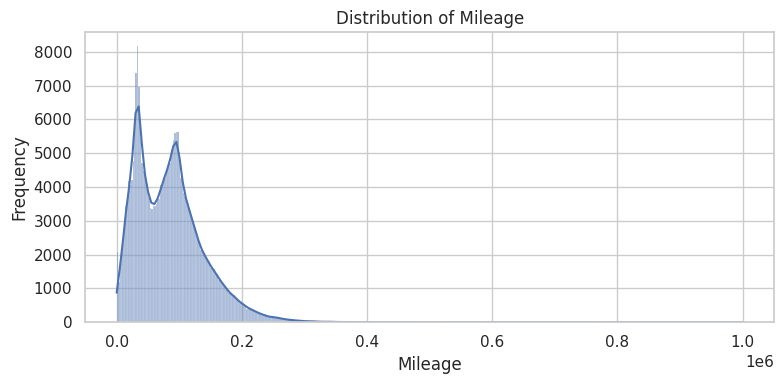

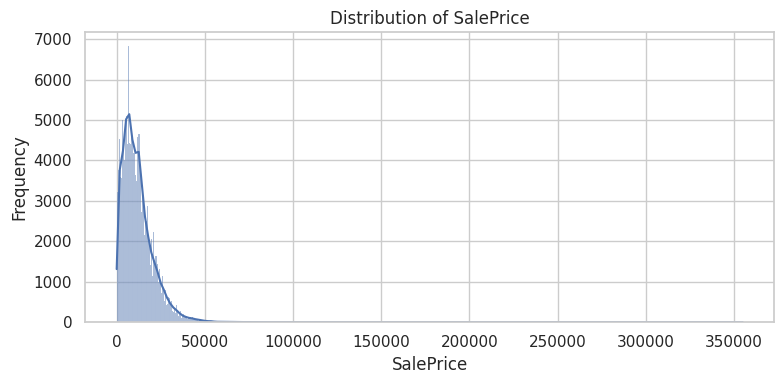

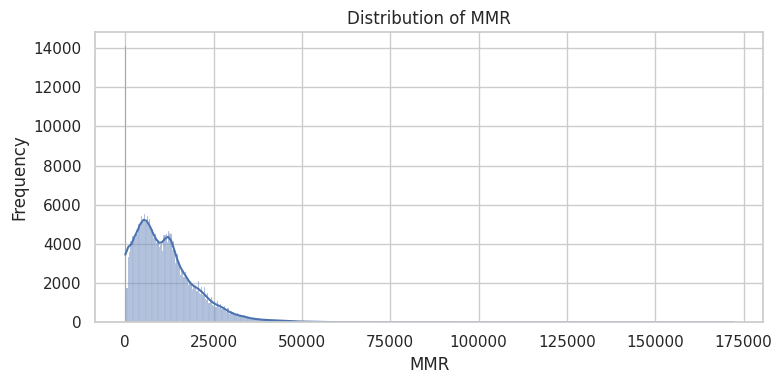

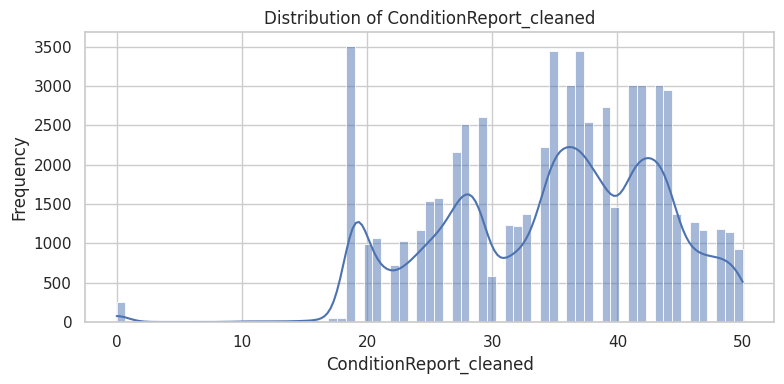

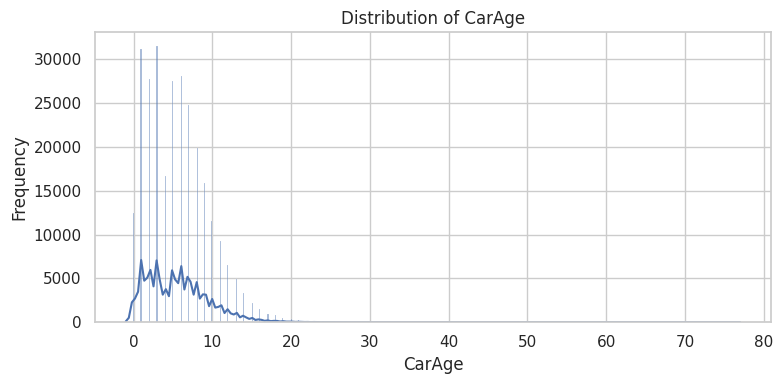

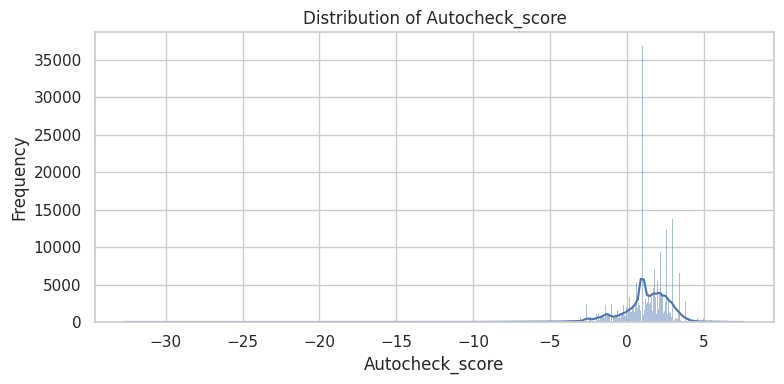

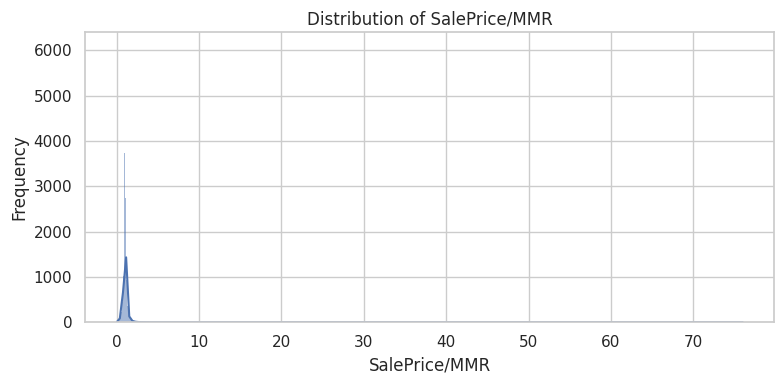

In [ ]:
# Loop through each column
num_columns=['Mileage','SalePrice','MMR','ConditionReport_cleaned','CarAge','Autocheck_score','SalePrice/MMR']
for column in num_columns:
    plt.figure(figsize=(8, 4))

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # For categorical data, use a bar plot
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


In [16]:
import numpy as np
df["LogMileage"] = np.log1p(df["Mileage"])  # log1p = log(1 + x), handles 0 safely
df["LogSalePrice"] = np.log1p(df["SalePrice"])
df["LogMMR"] = np.log1p(df["MMR"])

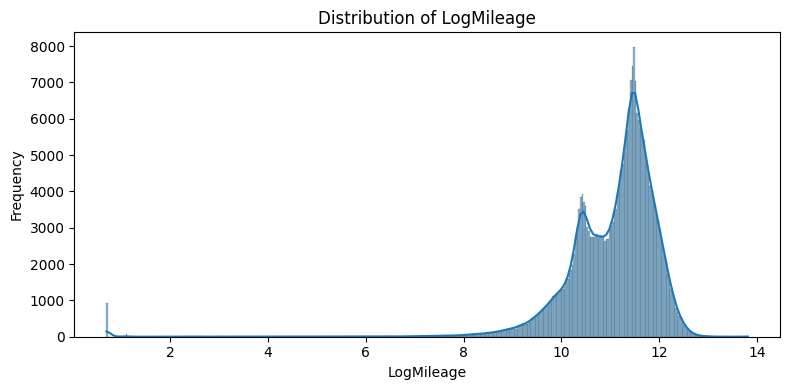

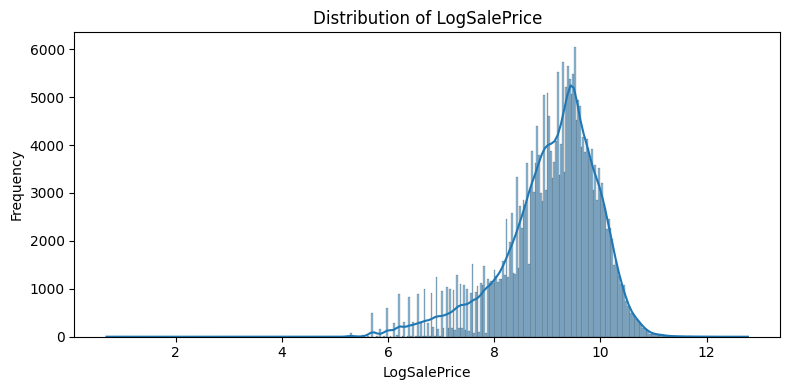

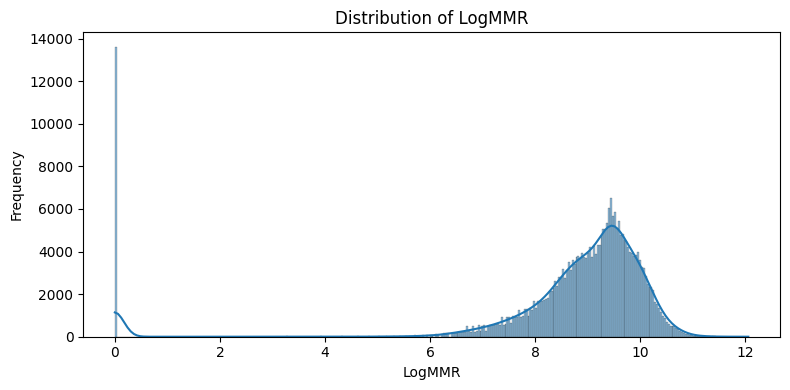

In [17]:
# Loop through each column
log_columns=['LogMileage','LogSalePrice','LogMMR']
for column in log_columns:
    plt.figure(figsize=(8, 4))

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # For categorical data, use a bar plot
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

### Handling lights inconsistency

In [18]:
# Rows with multiple light indicators
invalid_light_rows = df[(df[['LIGHTG', 'LIGHTY', 'LIGHTR']].sum(axis=1) > 1)]
print("Number of rows with conflicting lights:", len(invalid_light_rows))

Number of rows with conflicting lights: 15659


In [19]:
def fix_light(row):
    if row['LIGHTR'] == 1:
        return pd.Series([0, 0, 1], index=['LIGHTG', 'LIGHTY', 'LIGHTR'])
    elif row['LIGHTY'] == 1:
        return pd.Series([0, 1, 0], index=['LIGHTG', 'LIGHTY', 'LIGHTR'])
    elif row['LIGHTG'] == 1:
        return pd.Series([1, 0, 0], index=['LIGHTG', 'LIGHTY', 'LIGHTR'])
    else:
        return row[['LIGHTG', 'LIGHTY', 'LIGHTR']]

df[['LIGHTG', 'LIGHTY', 'LIGHTR']] = df.apply(fix_light, axis=1)


In [20]:
invalid_light_rows = df[(df[['LIGHTG', 'LIGHTY', 'LIGHTR']].sum(axis=1) > 1)]
print("Number of rows with conflicting lights after fix:", len(invalid_light_rows))

Number of rows with conflicting lights after fix: 0


# Data Cleaning & Feature Engineering
(why you did this? “this improves interpretability,” or “this reduces variance”)

## Deduplication

In [21]:
df.duplicated().sum()

np.int64(0)

## Handling missing values:(JDPowersCat,AutocheckScore, Conditionreport)

In [ ]:
# Handle missing values
df.fillna(df.median(), inplace=True)  # Or dropna, or fillna with 'Unknown' for cat vars

### JDpowers

In [ ]:
df['JDPowersCat'].value_counts()

,count
JDPowersCat,
SUV,84831
MIDSIZE CAR,61532
PICKUP,36037
COMPACT CAR,34850
LUXURY CAR,32383
VAN,14705
SPORTS CAR,9044
FULLSIZE CAR,3263
EXCLUDED,1336


In [22]:
# Example: average return rate by vehicle type (for labeled subset)
df[df['Guaranteed']==1].groupby("JDPowersCat")["Returned"].mean().sort_values(ascending=False)

,Returned
JDPowersCat,
LUXURY CAR,0.278337
SPORTS CAR,0.261637
PICKUP,0.224333
FULLSIZE CAR,0.214612
SUV,0.212652
MIDSIZE CAR,0.193163
VAN,0.176414
COMPACT CAR,0.170666
EXCLUDED,0.160000


In [23]:
# Create a new column to preserve the original
df["JDPowersCat_unknown"] = df["JDPowersCat"].fillna("UNKNOWN")
#2
# Find the mode (most common category)
most_common = df["JDPowersCat"].mode()[0]

# Create a second version with mode imputation
df["JDPowersCat_mode"] = df["JDPowersCat"].fillna(most_common)


### AutoCheck & Condition Report

In [24]:
#Autocheck_score
df['Autocheck_score'].value_counts()
df['Autocheck_score'].describe()

,Autocheck_score
count,269017.000000
mean,1.205120
std,1.744673
min,-32.599998
25%,0.600000
50%,1.400000
75%,2.272727
max,7.571429


In [25]:
# addressing the inconsistency in ConditionReport
df['ConditionReport'].value_counts()
#df['ConditionReport'].describe(include=all)

,count
ConditionReport,
19,3507
35,3446
37,3444
43,3018
41,3014
36,3013
42,3008
44,2954
A,2783


In [26]:
# finding the autocheck score for non defined categories
df[df['ConditionReport']=='A']['Autocheck_score'].mean()
df[df['ConditionReport']=='A3']['Autocheck_score']# -1.43
df[df['ConditionReport']=='Y6']['Autocheck_score']# 1.75

,Autocheck_score
41827,1.75


In [27]:
df[df['ConditionReport'].isin(['EC', 'CL', 'AV', 'RG', 'PR', 'SL'])] \
  .groupby('ConditionReport')['Autocheck_score'].mean().sort_values(ascending=False)

,Autocheck_score
ConditionReport,
EC,1.553525
CL,1.409770
AV,1.043771
RG,0.474937
PR,0.158153
SL,-0.181910


In [36]:
df[df['ConditionReport'].isin(['A', 'AV'])].groupby('ConditionReport')['SaleYear'].min().sort_values(ascending=False)

,SaleYear
ConditionReport,
A,2013
AV,2013


In [37]:
# replacing the undefined categories with the accurate ones
df['ConditionReport_cleaned']=df['ConditionReport'].replace('A','AV')
df['ConditionReport_cleaned']=df['ConditionReport'].replace('A3','SL')
df['ConditionReport_cleaned']=df['ConditionReport'].replace('Y6','EC')

In [38]:
# Check if value is numeric
def convert_condition(value):
    try:
        return float(value)
    except:
        return np.nan  # we’ll handle these next

# Apply conversion
df['ConditionReport_cleaned'] = df['ConditionReport_cleaned'].apply(convert_condition)

# Now handle categorical codes — map them reasonably
# Example map based on observed frequencies (you can tune these)
condition_map = {
    'EC': 50,   # Extra Clean
    'CL': 43,   # Clean
    'AV': 35,   # Average = slightly lower
    'RG': 25,   # Rough
    'PR': 15,   # Poor
    'SL': 5,   # Salvage-like
}

# Step 3: Apply mapping only to string values (non-numeric)
df['ConditionReport_cleaned'] = df['ConditionReport_cleaned'].apply(
    lambda x: condition_map[x] if isinstance(x, str) and x in condition_map else x
)

In [39]:
df['ConditionReport_cleaned'].value_counts()

,count
ConditionReport_cleaned,
19.0,3507
35.0,3446
37.0,3444
43.0,3018
41.0,3014
36.0,3013
42.0,3008
44.0,2954
39.0,2735


In [40]:
count = df['Autocheck_score'].isna() & df['ConditionReport'].notna()
print("Count:", count.sum())

Count: 3281


Topic	Answer
Why StandardScaler?	Good for z-score normalization, ensures fair comparison
Needs normal distribution?	Not strictly — works even if not perfectly normal
Can it handle NaNs?	No, you must filter them out before applying it

In [41]:
# Create a new df for standardization
score_scaler = StandardScaler()
condition_scaler = StandardScaler()

# Fit only on valid values
df['Autocheck_score_std'] = np.nan
df['ConditionReport_std'] = np.nan


# Standardize only the non-null values
valid_auto = df['Autocheck_score'].notna()
valid_cond = df['ConditionReport_cleaned'].notna()

df.loc[valid_auto, 'Autocheck_score_std'] = score_scaler.fit_transform(df.loc[valid_auto, ['Autocheck_score']])
df.loc[valid_cond, 'ConditionReport_std'] = condition_scaler.fit_transform(df.loc[valid_cond, ['ConditionReport_cleaned']])


In [42]:
# Create a new df for standardization
score_norm_scaler = MinMaxScaler()
condition_norm_scaler = MinMaxScaler()

# Fit only on valid values
df['Autocheck_score_norm'] = np.nan
df['ConditionReport_norm'] = np.nan


# Standardize only the non-null values
valid_auto = df['Autocheck_score'].notna()
valid_cond = df['ConditionReport_cleaned'].notna()

df.loc[valid_auto, 'Autocheck_score_norm'] = score_norm_scaler.fit_transform(df.loc[valid_auto, ['Autocheck_score']])
df.loc[valid_cond, 'ConditionReport_norm'] = condition_norm_scaler.fit_transform(df.loc[valid_cond, ['ConditionReport_cleaned']])


<ipython-input-43-8c9dd2793de4>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


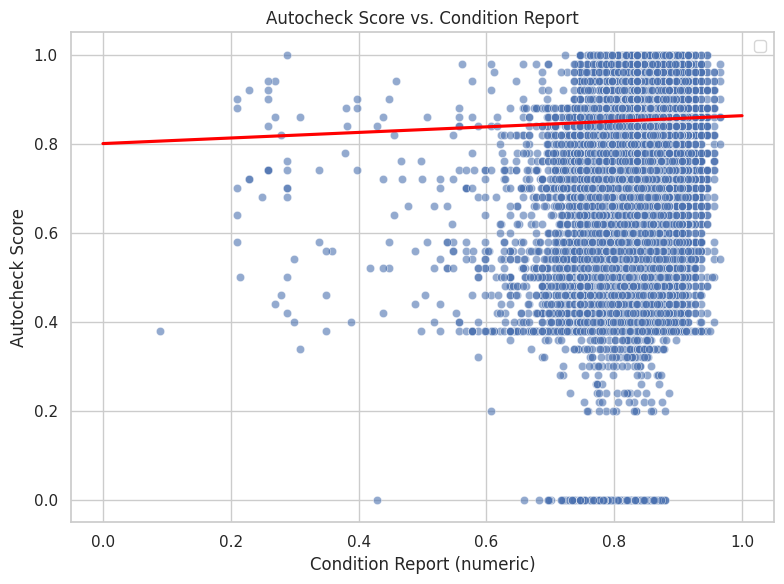

In [43]:
# Filter rows with both Autocheck_score and ConditionReport_numeric present
df_valid = df[df['Autocheck_score_norm'].notna() & df['ConditionReport_norm'].notna()]

# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_valid,
    x='Autocheck_score_norm',
    y='ConditionReport_norm',
    alpha=0.6
)

# Add a regression line to show trend
sns.regplot(
    data=df_valid,
    x='ConditionReport_norm',
    y='Autocheck_score_norm',
    scatter=False,
    color='red',
    line_kws={'label': 'Linear Trend'}
)

plt.title('Autocheck Score vs. Condition Report')
plt.xlabel('Condition Report (numeric)')
plt.ylabel('Autocheck Score')
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
df_valid['Autocheck_score'].corr(df_valid['ConditionReport_cleaned'])

np.float64(0.2403791726524752)

## Handling outliers( Mileage, Price, MMR)


visulize with boxplot

### Mileage

In [46]:
df['CarAge'].describe()

,CarAge
count,278337.000000
mean,5.592860
std,3.956124
min,-1.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,77.000000


In [47]:
df["Mileage"].corr(df["CarAge"])

np.float64(0.7006303207454095)

In [48]:
(df["Mileage"]/df["CarAge"]).median()

15817.0

In [72]:
df["CarAge"] = df["CarAge"].replace(-1, 0)
df["mileperyear"]=df["Mileage"]/df["CarAge"]
Q1 = df["mileperyear"].quantile(0.25)
Q3 = df["mileperyear"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
print(upper)
df[df["mileperyear"] > upper].shape[0]
df["MaxMileage"] = np.where(df["mileperyear"] > upper, upper, df["Mileage"])

39437.01136363637


21604

In [70]:
df["CarAge"] = df["CarAge"].replace(-1, 0)
df["mileperyear"]=df["Mileage"]/df["CarAge"]
df[df["mileperyear"] > 2000000].shape[0]

12460

In [ ]:
df.loc[df["Mileage"] == 999999, "Mileage"] = df.groupby("CarYear")["Mileage"].transform("median")
df[]

In [58]:
df[df['Mileage']>900000]

,RowID,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,LIGHTG,LIGHTY,LIGHTR,PSI,Arbitrated,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned,LogMileage,LogSalePrice,LogMMR,Upd_SaleDate,SaleYear,CarAge,Price/MMR,VehicleStatus,PriceToMMR
4425,4425,350957,226736,549524,SALSK2D4XAA219368,NADE,LAND ROVER,39250,2010,41300,SUV,0,0,0,0,0,0,1,0,0,0,13-04-24,-1.000000,NaN,0,NaN,13.216810,10.577732,10.628642,2013-04-24,2013,3,0.950363,Not Guaranteed,0.950363
30598,30598,341509,434460,798542,1FDJE37L7FHA50262,AYCA,FORD,750,1985,0,EXCLUDED,0,0,1,0,0,1,0,0,0,0,13-05-27,-1.421053,NaN,0,NaN,13.590544,6.621406,0.000000,2013-05-27,2013,28,inf,Not Guaranteed,inf
30604,30604,341509,414778,943747,1FUJA6CK35LV04980,SVAA,FREIGHTLINER,9250,2005,0,EXCLUDED,0,0,1,0,0,0,0,0,1,0,13-03-19,NaN,RG,0,NaN,13.757614,9.132487,0.000000,2013-03-19,2013,8,inf,Not Guaranteed,inf
30633,30633,341509,426006,694266,2HSCNAPR05C159391,AYCA,INTERNATIONAL,15000,2005,0,EXCLUDED,0,0,1,0,0,0,0,0,0,0,13-09-09,NaN,NaN,0,NaN,13.450612,9.615872,0.000000,2013-09-09,2013,8,inf,Not Guaranteed,inf
30634,30634,341509,21539,806002,2HSFMAMR8VC031548,SVAA,INTERNATIONAL,5000,1997,0,EXCLUDED,0,0,1,0,0,0,0,0,0,0,13-06-18,NaN,NaN,0,NaN,13.599843,8.517393,0.000000,2013-06-18,2013,16,inf,Not Guaranteed,inf
30637,30637,341509,426006,654018,3HSCNAPR45N055758,AYCA,INTERNATIONAL,16750,2005,0,NaN,0,0,1,0,0,0,0,0,0,0,13-09-09,NaN,NaN,0,NaN,13.390892,9.726213,0.000000,2013-09-09,2013,8,inf,Not Guaranteed,inf
48208,48208,324567,129121,952026,KNAFE221195652457,RSAA,KIA,6900,2009,1825,COMPACT CAR,0,0,0,0,0,0,0,0,1,0,13-11-24,-0.125000,NaN,0,NaN,13.766349,8.839422,7.509883,2013-11-24,2013,4,3.780822,Not Guaranteed,3.780822
48766,48766,322976,369585,995981,JHLRD18691C022320,MAAI,HONDA,600,2001,1250,SUV,0,0,1,0,0,1,0,0,1,0,13-12-17,NaN,NaN,0,NaN,13.811484,6.398595,7.131699,2013-12-17,2013,12,0.480000,Not Guaranteed,0.480000
52940,52940,322091,156218,580482,2HSCEAPR77C447573,INDY,INTERNATIONAL,18500,2007,0,NaN,0,0,1,0,0,0,0,1,0,0,13-04-03,NaN,NaN,0,NaN,13.271616,9.825580,0.000000,2013-04-03,2013,6,inf,Not Guaranteed,inf
60367,60367,309467,393331,822733,1HSHXSBR75J029736,INDY,INTERNATIONAL,12450,2005,0,NaN,0,0,0,0,0,0,1,0,0,0,13-12-13,NaN,AV,0,NaN,13.620388,9.429556,0.000000,2013-12-13,2013,8,inf,Not Guaranteed,inf


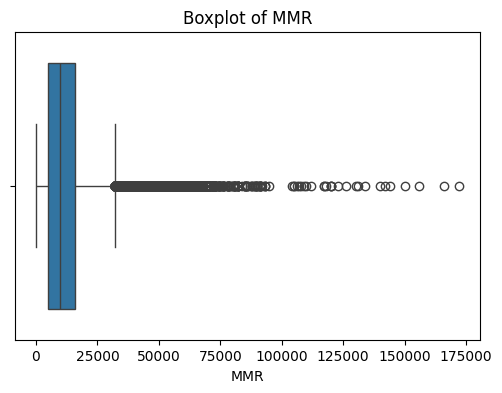

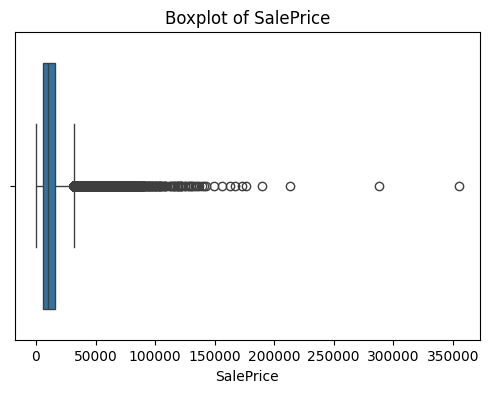

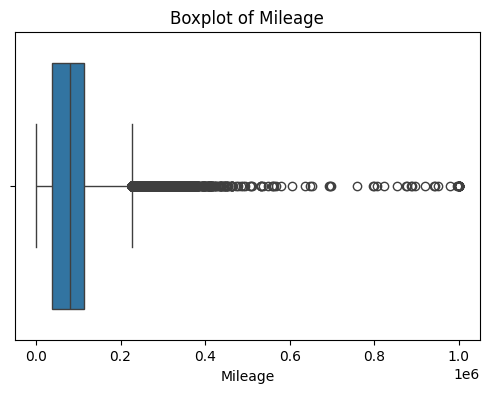

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["MMR", "SalePrice", "Mileage"]

for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

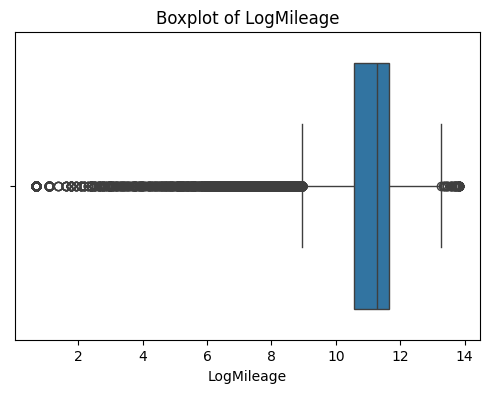

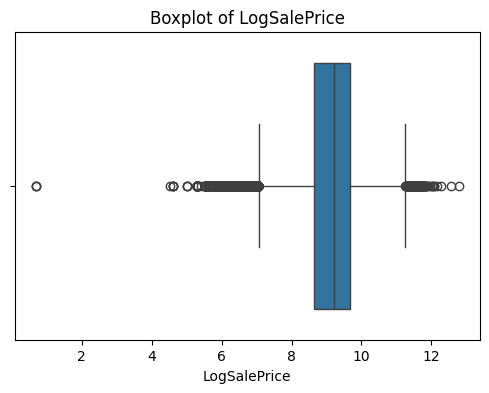

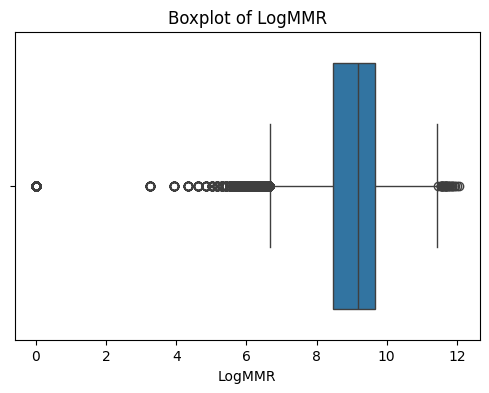

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

log_columns=['LogMileage','LogSalePrice','LogMMR']


for col in log_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Apply to your key features
for col in ["MMR", "SalePrice", "Mileage"]:
    detect_outliers_iqr(df, col)


MMR: 7800 outliers
SalePrice: 9405 outliers
Mileage: 4387 outliers


In [ ]:
df[['MMR','SalePrice']].describe()


,MMR,SalePrice
count,278337.000000,278337.000000
mean,11388.524882,11973.232032
std,9025.527367,9083.860494
min,0.000000,1.000000
25%,4775.000000,5600.000000
50%,9700.000000,10100.000000
75%,15750.000000,16000.000000
max,172000.000000,355000.000000


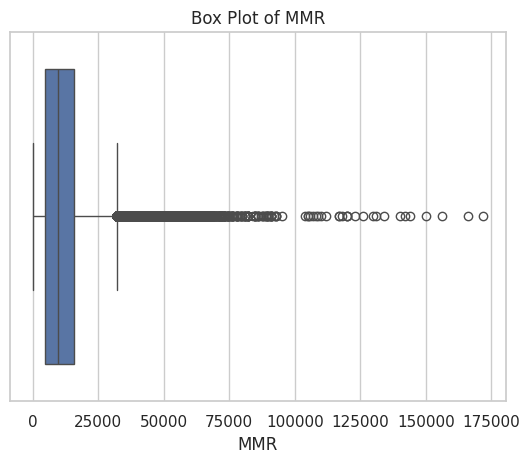

In [ ]:
sns.boxplot(x=df["MMR"])
plt.title("Box Plot of MMR")
plt.xlabel("MMR")
plt.show()

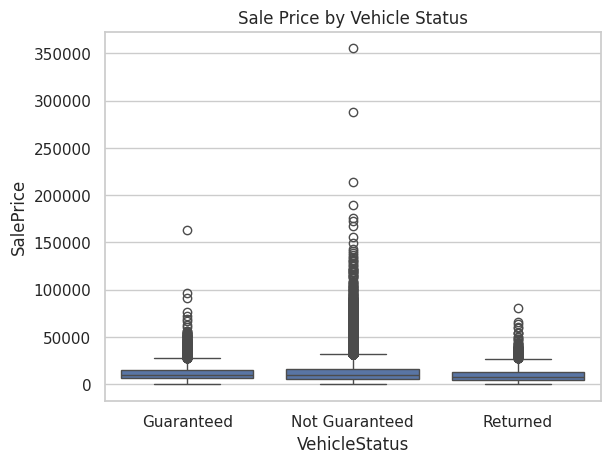

In [ ]:
sns.boxplot(x="VehicleStatus", y="SalePrice", data=df)
plt.title("Sale Price by Vehicle Status")
plt.show()

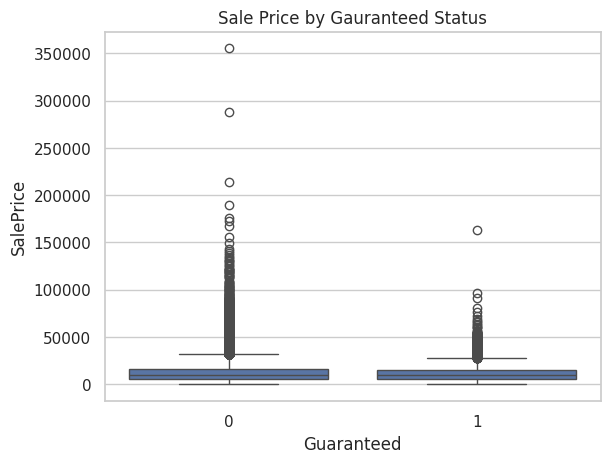

In [ ]:
sns.boxplot(x="Guaranteed", y="SalePrice", data=df)
plt.title("Sale Price by Gauranteed Status")
plt.show()

## Encode categorical features (OneHotEncoding, LabelEncoder)


In [ ]:
# Fix categorical text issues
df['category_column'] = df['category_column'].str.lower().str.strip()

pd.get_dummies(df['categorical_feature']) # or OrdinalEncoder

## Date/time features: SaleDate


In [31]:
# Step 1: Convert SaleDate to datetime (format: YY-MM-DD)
df['Upd_SaleDate'] = pd.to_datetime(df['SaleDate'], format='%y-%m-%d', errors='coerce')

df.head()

,RowID,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,LIGHTG,LIGHTY,LIGHTR,PSI,Arbitrated,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned,LogMileage,LogSalePrice,LogMMR,JDPowersCat_unknown,JDPowersCat_mode,Upd_SaleDate
0,0,351757,441081,37055,1FAHP3M27CL374352,CAAI,FORD,13000,2012,13050,COMPACT CAR,0,0,0,0,0,0,0,0,0,1,13-07-25,1.000000,NaN,1,0.0,10.520186,9.472782,9.476620,COMPACT CAR,COMPACT CAR,2013-07-25
1,1,351757,442235,248,1G1JE6SB7D4103706,DETA,CHEVROLET,13900,2013,13600,COMPACT CAR,0,0,0,0,0,0,0,0,0,1,13-10-24,NaN,NaN,0,NaN,5.517453,9.539716,9.517899,COMPACT CAR,COMPACT CAR,2013-10-24
2,2,351757,436280,39627,1G1PG5SC4C7102274,CAAI,CHEVROLET,13800,2012,14050,MIDSIZE CAR,0,0,0,1,1,0,0,0,1,1,13-04-18,-2.666667,41,0,NaN,10.587291,9.532496,9.550449,MIDSIZE CAR,MIDSIZE CAR,2013-04-18
3,3,351757,436280,50773,1G1PG5SC5C7113820,CAAI,CHEVROLET,12900,2012,13150,MIDSIZE CAR,0,0,0,1,0,0,0,0,1,1,13-04-18,1.000000,31,0,NaN,10.835140,9.465060,9.484253,MIDSIZE CAR,MIDSIZE CAR,2013-04-18
4,4,351757,434202,54133,1GNKVGED4BJ301146,SVAA,CHEVROLET,17800,2011,18050,SUV,1,0,0,1,0,0,0,0,1,1,13-02-26,-1.400000,34,0,NaN,10.899218,9.787010,9.800956,SUV,SUV,2013-02-26


## Feature scaling if using distance-based models (StandardScaler, MinMaxScaler)



In [ ]:
# KNN/ SVM/ LR

## Combine or bin features (e.g., group ages or income)



### Creating CarAge

In [32]:
# Step 2: Extract sale year
df['SaleYear'] = df['Upd_SaleDate'].dt.year

# Step 3: Calculate car age at sale
df['CarAge'] = df['SaleYear'] - df['CarYear']
df['CarAge'].max()
df['CarAge'].min()

-1

In [33]:
df[df['CarAge']<0]['CarAge'].value_counts()

,count
CarAge,
-1,285


Why -1 Car Age Can Be Valid:
Car manufacturers often release next year’s model in the current year.

For example, a "2014" model might be available for sale in late 2013.

So:

CarYear = 2014

SaleDate = 2013-07-25

CarAge = 2013 - 2014 = -1

This is common in the auto industry and not an error if the difference is exactly one year.

### Creating PriceToMMR

In [34]:
df['PriceToMMR']=df['SalePrice']/df['MMR']

In [ ]:
# Example: create age group
#df['age_group'] = pd.cut(df['age'], bins=[0,18,35,60,100], labels=['Teen','Young','Adult','Senior'])

# Drop high-cardinality features or identifiers
#df.drop(columns=['id'], inplace=True)

<Axes: xlabel='CarMake', ylabel='SalePrice'>

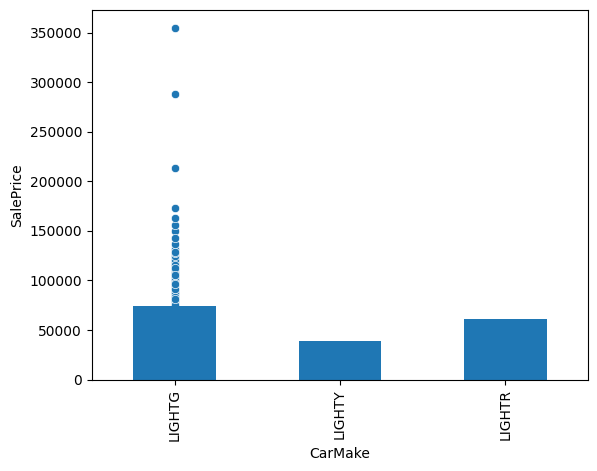

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sale price vs MMR
sns.scatterplot(data=df, x='MMR', y='SalePrice')

# Count of each CarMake
df['CarMake'].value_counts().plot(kind='bar')

# Distribution of vehicle lights
df[['LIGHTG', 'LIGHTY', 'LIGHTR']].sum().plot(kind='bar')

In [133]:
df['SalePrice'].corr(df['MMR'])

np.float64(0.8945026116004198)

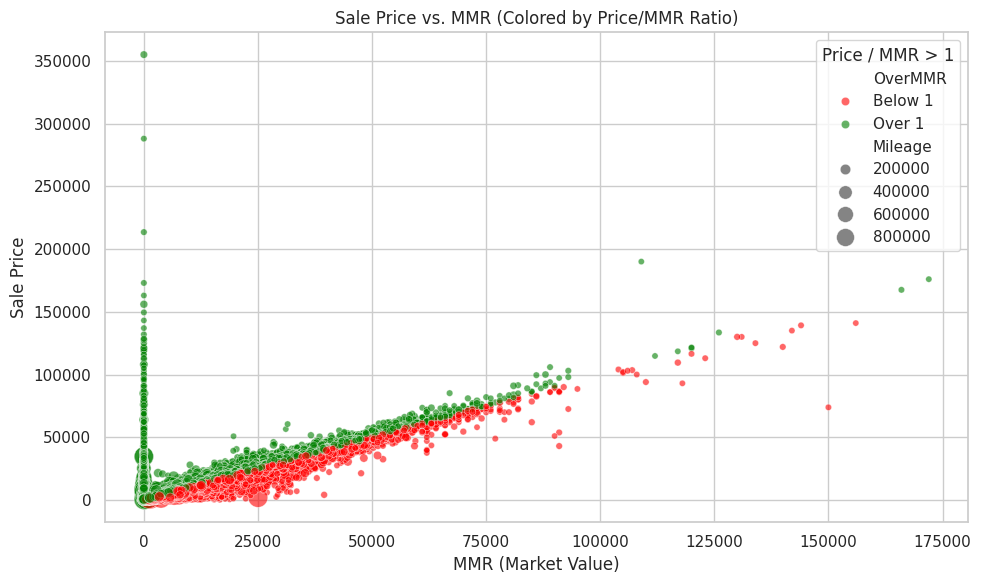

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a PriceToMMR column
df["PriceToMMR"] = df["SalePrice"] / df["MMR"]

# Step 2: Create a category column for color
df["OverMMR"] = df["PriceToMMR"].apply(lambda x: "Over 1" if x > 1 else "Below 1")

# Step 3: Bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="MMR",
    y="SalePrice",
    hue="OverMMR",
    size="Mileage",  # Optional: adjust size by mileage
    sizes=(20, 200),  # Bubble size range
    alpha=0.6,
    palette={"Over 1": "green", "Below 1": "red"}
)

# Labels and formatting
plt.title("Sale Price vs. MMR (Colored by Price/MMR Ratio)")
plt.xlabel("MMR (Market Value)")
plt.ylabel("Sale Price")
plt.legend(title="Price / MMR > 1")
plt.tight_layout()
plt.show()


## Buyer-Level Aggregation

In [74]:
# Unique buyers who purchased at least one guaranteed vehicle
buyers_with_guarantee = df[df["Guaranteed"] == 1]["BuyerID"].unique()

# Unique buyers in the full dataset
all_buyers = df["BuyerID"].unique()

# Unique buyers who NEVER bought a guaranteed vehicle
buyers_without_guarantee = list(set(all_buyers) - set(buyers_with_guarantee))

# Print counts
print("Buyers WITH at least one guaranteed vehicle:", len(buyers_with_guarantee))
print("Buyers WITHOUT any guaranteed vehicle:", len(buyers_without_guarantee))


Buyers WITH at least one guaranteed vehicle: 2348
Buyers WITHOUT any guaranteed vehicle: 1


In [77]:
all_buyers = df["BuyerID"].nunique()
all_buyers

2349

In [89]:
df["BuyerID"].unique()
#buyers_without_guarantee

array([351757, 351746, 351692, ...,    724,    376,    329])

In [94]:
# he is the only Buyer without Gaurantee 191208 with 65 rows
df[(df['BuyerID'] == 351746) & (df['Guaranteed'] == 1)]

,RowID,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,LIGHTG,LIGHTY,LIGHTR,PSI,Arbitrated,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned,LogMileage,LogSalePrice,LogMMR,Upd_SaleDate,SaleYear,CarAge,Price/MMR,VehicleStatus,PriceToMMR,mileperyear
152,152,351746,278479,53613,5FNYF3H42BB057704,FAAO,HONDA,17500,2011,18350,SUV,1,0,0,0,0,0,0,0,1,1,13-12-17,1.4,40,1,0.0,10.889566,9.770013,9.817439,2013-12-17,2013,2,0.953678,Guaranteed,0.953678,26806.5


In [84]:
buyers_with_guarantee = df[df["Guaranteed"] == 1][:20]["BuyerID"].unique()
buyers_with_guarantee

array([351757, 351746, 351692, 351690, 351612, 351601, 351584])

### Return Analysis

In [129]:
# Step 2: Filter guaranteed purchases
df_labeled = df[df['Guaranteed'] == 1]
# Step 3: Aggregate guaranteed-only metrics by BuyerID
buyer_stats = df_labeled.groupby('BuyerID').agg(
    avg_mileage=('Mileage', 'mean'),
    avg_age=('CarAge', 'mean'),
    avg_pricemmr=('PriceToMMR', 'mean'),
    sum_lightg=('LIGHTG', 'sum'),
    sum_lighty=('LIGHTY', 'sum'),
    sum_lightr=('LIGHTR', 'sum'),
    sum_psi=('PSI', 'sum'),
    sum_salvage=('Salvage', 'sum'),
    sum_ove=('OVE', 'sum'),
    sum_simulcast=('Simulcast', 'sum'),
    sum_inlane=('InLane', 'sum'),
    sum_arbitrated=('Arbitrated', 'sum'),
    sum_psieligible=('PSI_Eligible', 'sum'),
    avg_autocheck=('Autocheck_score', 'mean'),
    avg_condition=('ConditionReport_cleaned', 'mean'),
    guaranteed_count=('Guaranteed', 'sum'),
    returned_count=('Returned', 'sum')
).reset_index()

# Step 4: Compute return rate
buyer_stats['return_rate'] = buyer_stats['returned_count'] / buyer_stats['guaranteed_count']

# Step 5: Compute total purchases per buyer (guaranteed + non-guaranteed)
total_purchases = df.groupby('BuyerID').size().reset_index(name='total_purchases')

# Step 6: Merge and calculate guarantee rate
buyer_stats = pd.merge(buyer_stats, total_purchases, on='BuyerID', how='left')
buyer_stats['guarantee_rate'] = buyer_stats['guaranteed_count'] / buyer_stats['total_purchases']
buyer_stats['risk_status']=np.where(buyer_stats['return_rate']>0.1,'High Risk','Low Risk')


In [130]:
buyer_stats.head()

,BuyerID,avg_mileage,avg_age,avg_pricemmr,sum_lightg,sum_lighty,sum_lightr,sum_psi,sum_salvage,sum_ove,sum_simulcast,sum_inlane,sum_arbitrated,avg_autocheck,avg_condition,guaranteed_count,returned_count,return_rate,total_purchases,guarantee_rate,risk_status
0,329,165867.000000,9.0,0.770370,0,0,1,0,0,0,0,1,1,0.777778,NaN,1,0.0,0.000000,1,1.000000,Low Risk
1,376,118466.333333,8.0,0.926544,0,0,3,0,0,0,0,3,1,-1.231962,NaN,3,1.0,0.333333,8,0.375000,High Risk
2,724,150056.000000,6.0,1.116279,0,0,1,0,0,0,0,1,0,-1.888889,NaN,1,0.0,0.000000,9,0.111111,Low Risk
3,945,147932.000000,9.0,1.034483,0,0,1,0,1,0,0,1,0,1.315789,NaN,1,0.0,0.000000,1,1.000000,Low Risk
4,1187,115528.000000,10.0,1.154812,0,0,1,0,0,0,0,1,1,1.526316,NaN,1,1.0,1.000000,7,0.142857,High Risk


In [131]:
# Step 1: Group by risk status and sum the total trades per method
risk_trade_totals = buyer_stats.groupby("risk_status")[["sum_ove", "sum_simulcast", "sum_inlane"]].sum()

# Step 2: Convert to percentage within each group
risk_trade_pct = risk_trade_totals.div(risk_trade_totals.sum(axis=1), axis=0) * 100

# Step 3: Optional rounding
risk_trade_pct = risk_trade_pct.round(2)

risk_trade_pct


,sum_ove,sum_simulcast,sum_inlane
risk_status,,,
High Risk,2.04,17.50,80.46
Low Risk,4.81,18.09,77.10


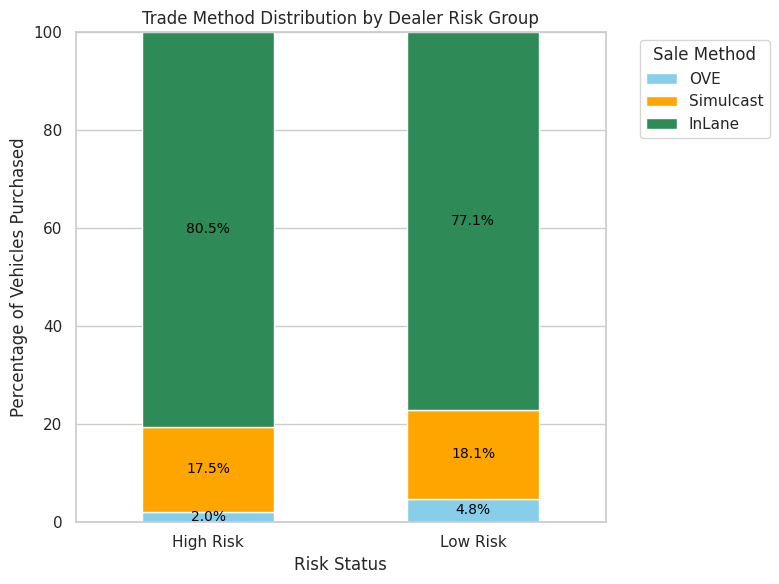

In [132]:
risk_trade_pct_clean = risk_trade_pct.rename(columns={
    "sum_ove": "OVE",
    "sum_simulcast": "Simulcast",
    "sum_inlane": "InLane"
})

# Create stacked bar chart
ax = risk_trade_pct_clean.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=["skyblue", "orange", "seagreen"]
)

# Add percentage labels
for i, (index, row) in enumerate(risk_trade_pct_clean.iterrows()):
    bottom = 0
    for col in risk_trade_pct_clean.columns:
        value = row[col]
        if value > 0:
            ax.text(
                i,
                bottom + value / 2,
                f"{value:.1f}%",
                ha="center", va="center", fontsize=10, color="black"
            )
            bottom += value

# Final formatting
plt.title("Trade Method Distribution by Dealer Risk Group")
plt.ylabel("Percentage of Vehicles Purchased")
plt.xlabel("Risk Status")
plt.ylim(0, 100)
plt.legend(title="Sale Method", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [126]:
# Count how many trade methods each buyer used
buyer_stats["num_methods_used"] = (
    (buyer_stats["sum_ove"] > 0).astype(int) +
    (buyer_stats["sum_simulcast"] > 0).astype(int) +
    (buyer_stats["sum_inlane"] > 0).astype(int)
)

# Filter buyers who used more than one method
multi_channel_buyers = buyer_stats[buyer_stats["num_methods_used"] > 1]

# Show count or preview
print("Number of buyers using more than one sale method:", len(multi_channel_buyers))
multi_channel_buyers.head()


Number of buyers using more than one sale method: 92


,BuyerID,avg_mileage,avg_age,avg_pricemmr,sum_lightg,sum_lighty,sum_lightr,sum_psi,sum_salvage,sum_ove,sum_simulcast,sum_inlane,sum_arbitrated,avg_autocheck,avg_condition,guaranteed_count,returned_count,return_rate,total_purchases,guarantee_rate,num_methods_used
22,3519,159998.000000,11.500000,1.171076,0,0,4,0,3,0,2,2,2,1.158211,NaN,4,2.0,0.500000,27,0.148148,2
40,5738,108402.000000,7.500000,1.008400,1,0,7,0,6,0,7,1,4,2.113340,39.000000,8,4.0,0.500000,14,0.571429,2
129,12266,159268.023810,12.785714,inf,1,1,18,0,0,0,5,7,19,0.338880,NaN,42,17.0,0.404762,78,0.538462,2
138,12884,20981.944444,1.111111,inf,7,4,0,4,0,0,12,2,0,1.443182,47.000000,18,1.0,0.055556,57,0.315789,2
183,16168,131122.750000,8.937500,1.040806,3,2,2,0,0,0,1,5,1,0.650674,27.333333,16,4.0,0.250000,154,0.103896,2


In [ ]:
# Step 1: Create the GuaranteeStatus column
#df["GuaranteeStatus"] = df["Guaranteed"].apply(lambda x: "Guaranteed" if x == 1 else "Not Guaranteed")

# Step 2: Group by GuaranteeStatus and sum each sale method
sales_counts = df.groupby("VehicleStatus")[["OVE", "Simulcast", "InLane"]].sum()

# Step 3: Normalize by row to get percentages (sum = 1 per group)
sales_percentage = sales_counts.div(sales_counts.sum(axis=1), axis=0) * 100

# Step 4: Round if you want cleaner percentages
sales_percentage = sales_percentage.round(2)

sales_percentage

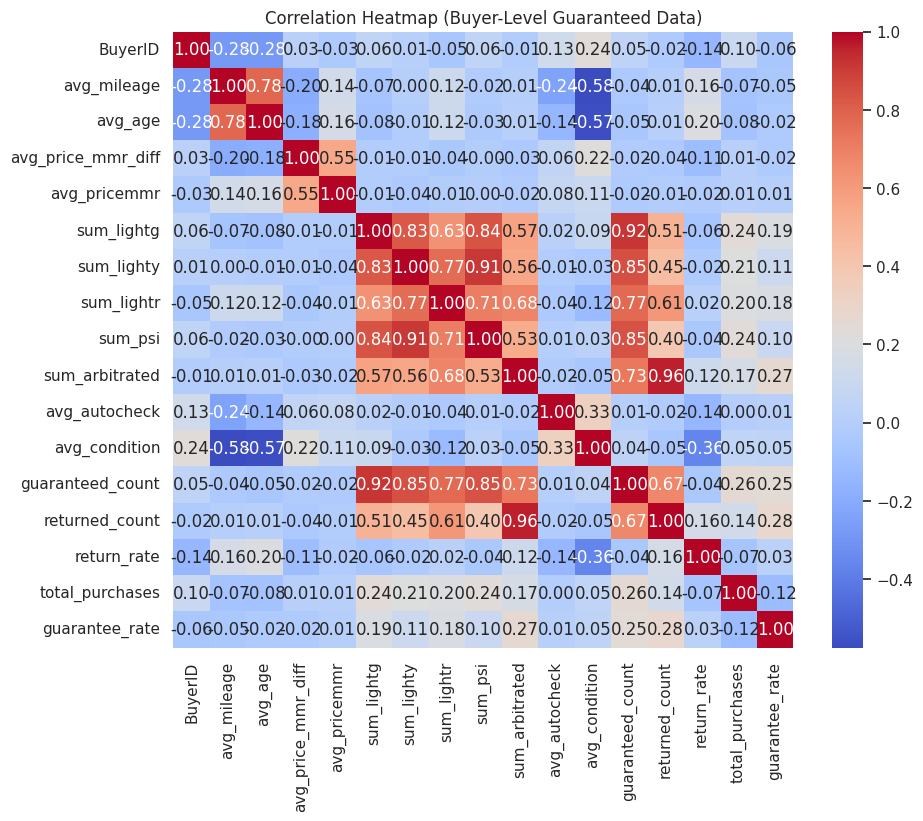

In [ ]:

# Correlation heatmap (only numeric columns)
numeric_cols = buyer_stats.select_dtypes(include='number')
corr = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Buyer-Level Guaranteed Data)")
plt.show()


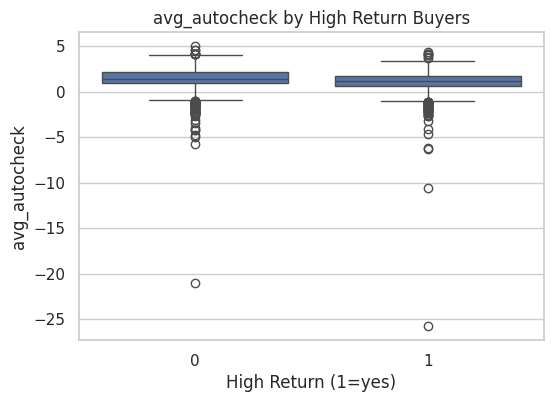

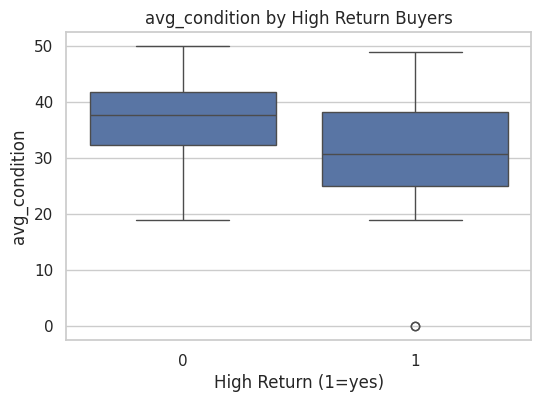

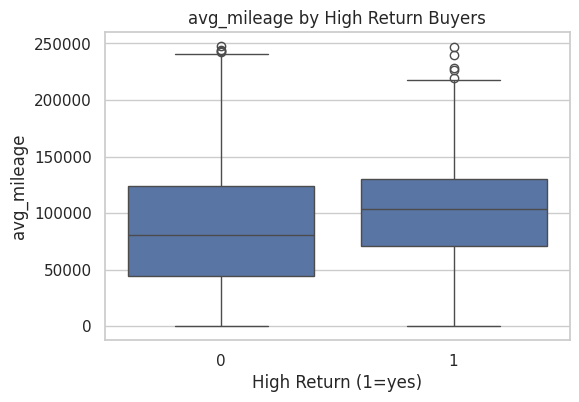

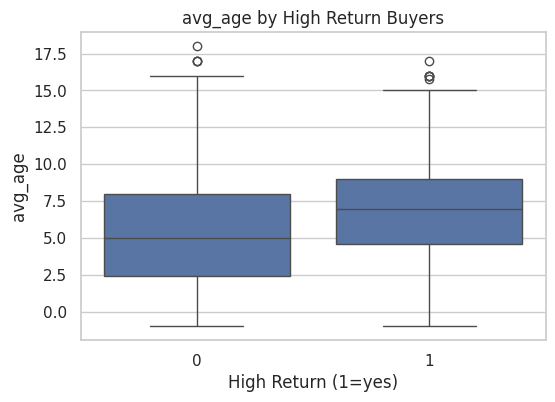

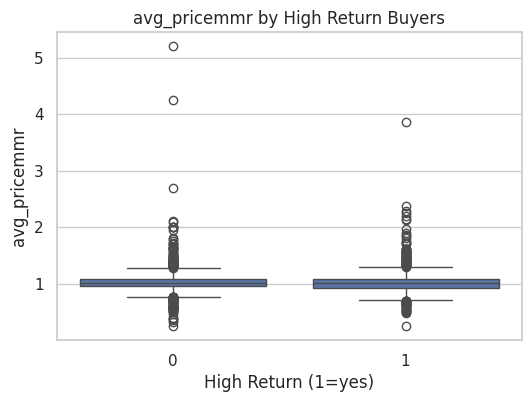

In [ ]:
# Label high-return buyers
buyer_stats['high_return'] = (buyer_stats['return_rate'] > 0.1).astype(int)

# Compare features across groups

features = ['avg_autocheck', 'avg_condition', 'avg_mileage', 'avg_age', 'avg_pricemmr']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=buyer_stats, x='high_return', y=feature)
    plt.title(f"{feature} by High Return Buyers")
    plt.xlabel("High Return (1=yes)")
    plt.ylabel(feature)
    plt.show()


In [ ]:
df['SalePrice/MMR'].groupby(df['Returned']).reset_index()

AttributeError: 'SeriesGroupBy' object has no attribute 'reset_index'

In [ ]:
buyer_df = df.groupby('BuyerID').agg({
    'Autocheck_score': ['mean', 'median', 'count'],
    'ConditionReport_numeric': ['mean', 'median'],
    'Risk_Flag': 'mean',  # Assuming 1 = High Risk, 0 = Low
    'VIN': 'nunique'      # Number of unique cars
}).reset_index()
buyer_df.columns = ['BuyerID', 'AutoCheck_mean', 'AutoCheck_median', 'Num_Records',
                    'CondRep_mean', 'CondRep_median', 'HighRiskRatio', 'UniqueVehicles']


### Buyer behavior analysis(both labeled and unlabeled)

# Vehicle-wise Analysis

In [ ]:
# Step 2: Create a guarantee status column
def classify(row):
    if row["Returned"] == 1:
        return "Returned"
    elif row["Guaranteed"] == 1:
        return "Guaranteed"
    else:
        return "Not Guaranteed"

df["VehicleStatus"] = df.apply(classify, axis=1)
pd.set_option('display.max_columns', None)
df.head(10)

,RowID,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,LIGHTG,LIGHTY,LIGHTR,PSI,Arbitrated,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned,LogMileage,LogSalePrice,LogMMR,Upd_SaleDate,SaleYear,CarAge,Price/MMR,VehicleStatus
0,0,351757,441081,37055,1FAHP3M27CL374352,CAAI,FORD,13000,2012,13050,COMPACT CAR,0,0,0,0,0,0,0,0,0,1,13-07-25,1.000000,NaN,1,0.0,10.520186,9.472782,9.476620,2013-07-25,2013,1,0.996169,Guaranteed
1,1,351757,442235,248,1G1JE6SB7D4103706,DETA,CHEVROLET,13900,2013,13600,COMPACT CAR,0,0,0,0,0,0,0,0,0,1,13-10-24,NaN,NaN,0,NaN,5.517453,9.539716,9.517899,2013-10-24,2013,0,1.022059,Not Guaranteed
2,2,351757,436280,39627,1G1PG5SC4C7102274,CAAI,CHEVROLET,13800,2012,14050,MIDSIZE CAR,0,0,0,1,1,0,0,0,1,1,13-04-18,-2.666667,41,0,NaN,10.587291,9.532496,9.550449,2013-04-18,2013,1,0.982206,Not Guaranteed
3,3,351757,436280,50773,1G1PG5SC5C7113820,CAAI,CHEVROLET,12900,2012,13150,MIDSIZE CAR,0,0,0,1,0,0,0,0,1,1,13-04-18,1.000000,31,0,NaN,10.835140,9.465060,9.484253,2013-04-18,2013,1,0.980989,Not Guaranteed
4,4,351757,434202,54133,1GNKVGED4BJ301146,SVAA,CHEVROLET,17800,2011,18050,SUV,1,0,0,1,0,0,0,0,1,1,13-02-26,-1.400000,34,0,NaN,10.899218,9.787010,9.800956,2013-02-26,2013,2,0.986150,Not Guaranteed
5,5,351757,442235,9978,1GNKVJED6CJ354137,DETA,CHEVROLET,26600,2012,25600,SUV,1,0,0,0,0,0,0,1,0,1,13-03-14,1.000000,CL,0,NaN,9.208238,10.188704,10.150387,2013-03-14,2013,1,1.039062,Not Guaranteed
6,6,351757,442235,13781,1GNKVLEDXCJ350653,DETA,CHEVROLET,31200,2012,26400,SUV,1,0,0,0,0,0,0,1,0,1,13-03-14,1.000000,CL,0,NaN,9.531119,10.348205,10.181157,2013-03-14,2013,1,1.181818,Not Guaranteed
7,7,351757,442235,8668,1GNKVLKD4DJ216369,DETA,CHEVROLET,32600,2013,33900,SUV,0,0,0,0,0,0,0,0,0,1,13-10-24,1.000000,NaN,0,NaN,9.067509,10.392098,10.431200,2013-10-24,2013,0,0.961652,Not Guaranteed
8,8,351757,442235,10278,1GNSCKE09DR103348,FAAO,CHEVROLET,48700,2013,0,SUV,0,0,0,0,0,0,0,0,0,0,13-07-22,1.000000,NaN,0,NaN,9.237858,10.793455,0.000000,2013-07-22,2013,0,inf,Not Guaranteed
9,9,351757,442235,14402,1GNSKKE73DR111980,DETA,CHEVROLET,49900,2013,0,SUV,1,0,0,0,0,0,0,1,0,0,13-03-14,3.000000,CL,0,NaN,9.575192,10.817796,0.000000,2013-03-14,2013,0,inf,Not Guaranteed


In [ ]:
df[df['VehicleStatus']=='Returned'].head()

,RowID,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,LIGHTG,LIGHTY,LIGHTR,PSI,Arbitrated,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned,LogMileage,LogSalePrice,LogMMR,Upd_SaleDate,SaleYear,CarAge,Price/MMR,VehicleStatus
11,11,351757,279792,38671,1VWAP7A3XCC037039,CAAI,VOLKSWAGEN,11000,2012,12650,MIDSIZE CAR,0,0,0,0,1,0,0,0,0,1,13-06-27,1.000000,NaN,1,1.0,10.562871,9.305741,9.445492,2013-06-27,2013,1,0.869565,Returned
1074,1074,351601,257053,49025,KMHHU6KH2AU019975,SVAA,HYUNDAI,18100,2010,16100,MIDSIZE CAR,0,0,0,0,1,0,0,0,0,1,13-07-23,1.800000,NaN,1,1.0,10.800106,9.803722,9.686637,2013-07-23,2013,3,1.124224,Returned
3340,3340,351299,440079,133033,1N4BA41E57C830947,SVAA,NISSAN,4000,2007,6025,MIDSIZE CAR,0,0,1,0,1,0,0,0,1,0,13-11-05,0.857143,21,1,1.0,11.798360,8.294300,8.703839,2013-11-05,2013,6,0.663900,Returned
3416,3416,351241,152394,66997,1D7HA18207J506014,SVAA,DODGE,14500,2007,13650,PICKUP,0,0,0,0,1,0,0,0,0,1,13-10-15,0.500000,NaN,1,1.0,11.112418,9.581973,9.521568,2013-10-15,2013,6,1.062271,Returned
3547,3547,351241,10548,25526,JA32U2FU4BU037551,SVAA,MITSUBISHI,13300,2011,10500,COMPACT CAR,0,0,0,0,1,0,0,0,0,1,13-08-27,2.333333,NaN,1,1.0,10.147492,9.495594,9.259226,2013-08-27,2013,2,1.266667,Returned


In [ ]:
# Step 3: Select attributes and group by GuaranteeStatus
summary = df.groupby("VehicleStatus").agg({
    'RowID': 'count',
    "Mileage": "median",
    "CarAge": "median",
    "SalePrice": "median",
    "PriceToMMR": "median"
     # to show how many vehicles in each group
}).reset_index()

print(summary)

    VehicleStatus   RowID  Mileage  CarAge  SalePrice  PriceToMMR
0      Guaranteed   15526  81195.0     5.0    10200.0    1.015152
1  Not Guaranteed  258644  79207.0     5.0    10200.0    1.011628
2        Returned    4167  95361.0     6.0     8100.0    1.010830


In [ ]:
# Step 3: Select attributes and group by GuaranteeStatus
summary = df.groupby("VehicleStatus").agg({
    'RowID': 'count',
    "Mileage": "mean",
    "CarAge": "mean",
    "SalePrice": "mean",
    "PriceToMMR": "mean"

     # to show how many vehicles in each group
}).reset_index()

print(summary)

    VehicleStatus   RowID       Mileage    CarAge     SalePrice  PriceToMMR
0      Guaranteed   15526  82500.134355  5.014943  11551.484349         inf
1  Not Guaranteed  258644  84115.152530  5.611652  12028.776825         inf
2        Returned    4167  97706.722822  6.579794  10096.996640         inf


In [ ]:
# Step 2: Count total vehicles in each group
group_total = df.groupby("VehicleStatus").size().rename("Total")

# Step 3: For each LIGHT column, count where that light is 1 *within each group*
lightg = df[df["LIGHTG"] == 1].groupby("VehicleStatus").size().rename("LIGHTG")
lighty = df[df["LIGHTY"] == 1].groupby("VehicleStatus").size().rename("LIGHTY")
lightr = df[df["LIGHTR"] == 1].groupby("VehicleStatus").size().rename("LIGHTR")

# Step 4: Combine all counts and compute ratios
summary = pd.concat([lightg, lighty, lightr], axis=1).fillna(0)
#summary["LIGHTG_ratio"] = summary["LIGHTG"] / summary["Total"]
#summary["LIGHTY_ratio"] = summary["LIGHTY"] / summary["Total"]
#summary["LIGHTR_ratio"] = summary["LIGHTR"] / summary["Total"]
summary['sum_vehicle'] = summary['LIGHTG'] + summary['LIGHTY'] + summary['LIGHTR']
summary["LIGHTG_ratio"] = summary["LIGHTG"] / summary["sum_vehicle"]
summary["LIGHTY_ratio"] = summary["LIGHTY"] / summary["sum_vehicle"]
summary["LIGHTR_ratio"] = summary["LIGHTR"] / summary["sum_vehicle"]

In [ ]:
summary

,LIGHTG,LIGHTY,LIGHTR,sum_vehicle,LIGHTG_ratio,LIGHTY_ratio,LIGHTR_ratio
VehicleStatus,,,,,,,
Guaranteed,3355,469,3511,7335,0.457396,0.063940,0.478664
Not Guaranteed,70814,11284,55433,137531,0.514895,0.082047,0.403058
Returned,419,102,1733,2254,0.185892,0.045253,0.768855


In [ ]:
plot_df = summary[["LIGHTG_ratio", "LIGHTY_ratio", "LIGHTR_ratio"]].copy()
plot_df.columns = ["LIGHTG", "LIGHTY", "LIGHTR"]
plot_df = plot_df.reset_index().melt(id_vars="VehicleStatus", var_name="LightType", value_name="Ratio")
plot_df

,VehicleStatus,LightType,Ratio
0,Guaranteed,LIGHTG,0.457396
1,Not Guaranteed,LIGHTG,0.514895
2,Returned,LIGHTG,0.185892
3,Guaranteed,LIGHTY,0.063940
4,Not Guaranteed,LIGHTY,0.082047
5,Returned,LIGHTY,0.045253
6,Guaranteed,LIGHTR,0.478664
7,Not Guaranteed,LIGHTR,0.403058
8,Returned,LIGHTR,0.768855


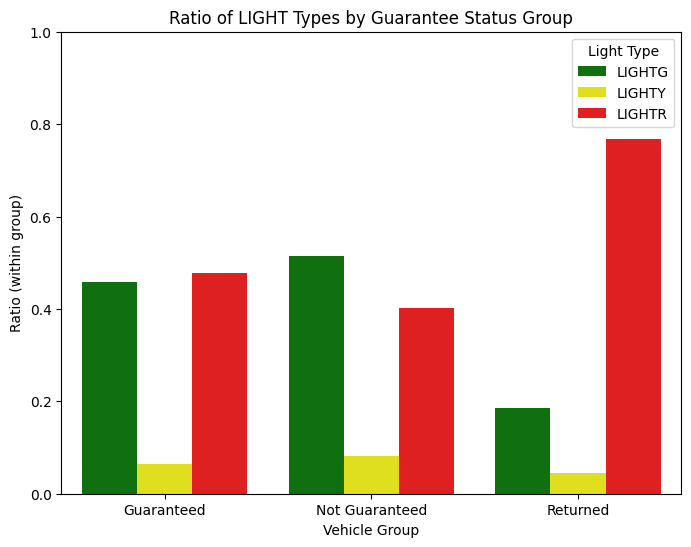

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for each LightType
custom_palette = {
    "LIGHTR": "red",
    "LIGHTY": "yellow",
    "LIGHTG": "green"
}

plt.figure(figsize=(8, 6))
sns.barplot(data=plot_df, x="VehicleStatus", y="Ratio", hue="LightType", palette=custom_palette)

plt.title("Ratio of LIGHT Types by Guarantee Status Group")
plt.ylabel("Ratio (within group)")
plt.xlabel("Vehicle Group")
plt.ylim(0, 1)
plt.legend(title="Light Type")
plt.show()


In [116]:
# Step 1: Create the GuaranteeStatus column
#df["GuaranteeStatus"] = df["Guaranteed"].apply(lambda x: "Guaranteed" if x == 1 else "Not Guaranteed")

# Step 2: Group by GuaranteeStatus and sum each sale method
sales_counts = df.groupby("VehicleStatus")[["OVE", "Simulcast", "InLane"]].sum()

# Step 3: Normalize by row to get percentages (sum = 1 per group)
sales_percentage = sales_counts.div(sales_counts.sum(axis=1), axis=0) * 100

# Step 4: Round if you want cleaner percentages
sales_percentage = sales_percentage.round(2)

sales_percentage


,OVE,Simulcast,InLane
GuaranteeStatus,,,
Guaranteed,3.54,17.82,78.64
Not Guaranteed,8.01,15.78,76.20


In [121]:
# Step 1: Create the GuaranteeStatus column
#df["GuaranteeStatus"] = df["Guaranteed"].apply(lambda x: "Guaranteed" if x == 1 else "Not Guaranteed")

# Step 2: Group by GuaranteeStatus and sum each sale method
sales_counts = df.groupby("VehicleStatus")[["OVE", "Simulcast", "InLane"]].sum()

# Step 3: Normalize by row to get percentages (sum = 1 per group)
sales_percentage = sales_counts.div(sales_counts.sum(axis=1), axis=0) * 100

# Step 4: Round if you want cleaner percentages
sales_percentage = sales_percentage.round(2)

sales_percentage

,OVE,Simulcast,InLane
VehicleStatus,,,
Guaranteed,3.95,17.91,78.14
Not Guaranteed,8.01,15.78,76.20
Returned,1.47,17.35,81.18


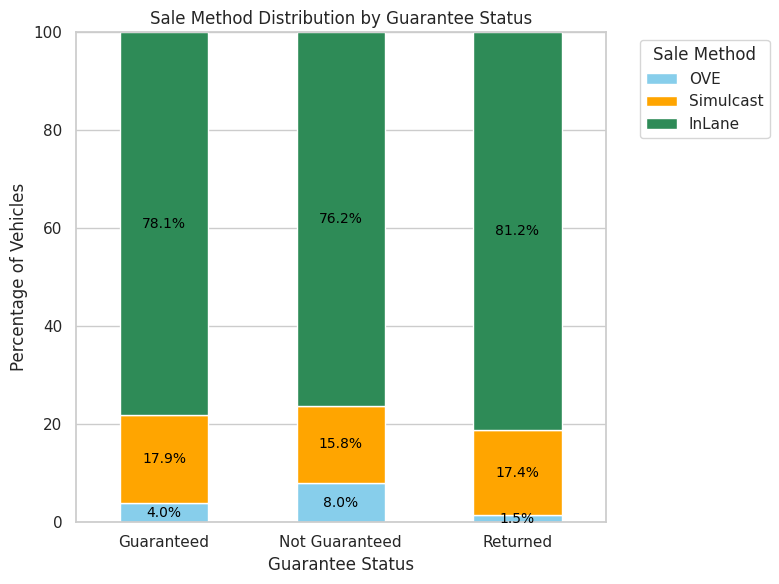

In [122]:
import matplotlib.pyplot as plt

# Create the percentage DataFrame
sales_percentage = pd.DataFrame({
    "OVE": [3.95, 8.01,1.47],
    "Simulcast": [17.91, 15.78,17.35],
    "InLane": [78.14, 76.20,81.18]
}, index=["Guaranteed", "Not Guaranteed", 'Returned'])

# Plot the stacked bar chart
ax = sales_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=["skyblue", "orange", "seagreen"]
)

# Add percentage labels on each section of the bar
for i, (index, row) in enumerate(sales_percentage.iterrows()):
    bottom = 0
    for col in sales_percentage.columns:
        value = row[col]
        if value > 0:
            ax.text(
                i,                # x position
                bottom + value / 2,  # y position (middle of segment)
                f"{value:.1f}%",  # label text
                ha="center", va="center", fontsize=10, color="black"
            )
            bottom += value

# Final plot formatting
plt.title("Sale Method Distribution by Guarantee Status")
plt.ylabel("Percentage of Vehicles")
plt.xlabel("Guarantee Status")
plt.ylim(0, 100)
plt.legend(title="Sale Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

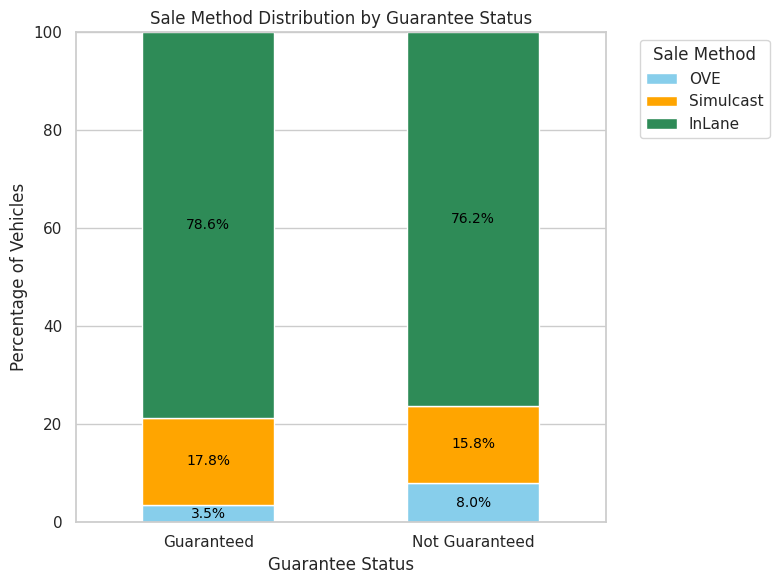

In [119]:
import matplotlib.pyplot as plt

# Create the percentage DataFrame
sales_percentage = pd.DataFrame({
    "OVE": [3.54, 8.01],
    "Simulcast": [17.82, 15.78],
    "InLane": [78.64, 76.20]
}, index=["Guaranteed", "Not Guaranteed"])

# Plot the stacked bar chart
ax = sales_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=["skyblue", "orange", "seagreen"]
)

# Add percentage labels on each section of the bar
for i, (index, row) in enumerate(sales_percentage.iterrows()):
    bottom = 0
    for col in sales_percentage.columns:
        value = row[col]
        if value > 0:
            ax.text(
                i,                # x position
                bottom + value / 2,  # y position (middle of segment)
                f"{value:.1f}%",  # label text
                ha="center", va="center", fontsize=10, color="black"
            )
            bottom += value

# Final plot formatting
plt.title("Sale Method Distribution by Guarantee Status")
plt.ylabel("Percentage of Vehicles")
plt.xlabel("Guarantee Status")
plt.ylim(0, 100)
plt.legend(title="Sale Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



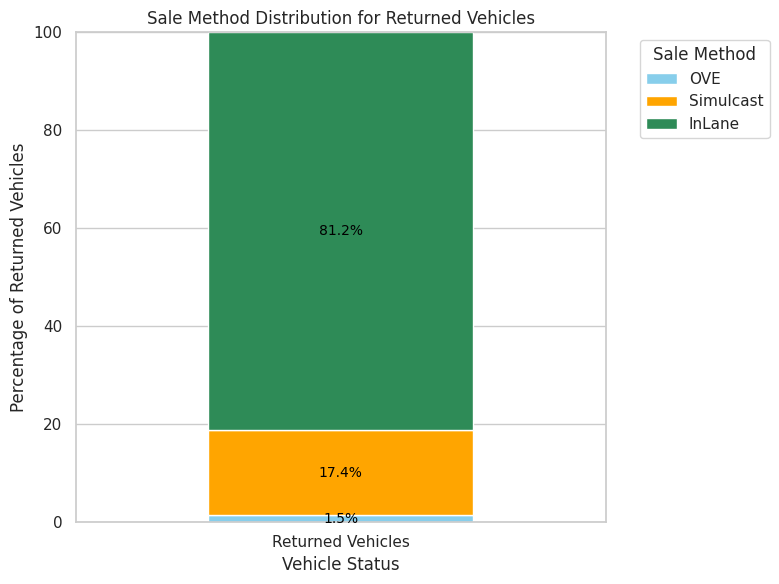

In [120]:
# Step 1: Filter only returned vehicles
returned_df = df[df["Returned"] == 1]

# Step 2: Sum the sale method columns
returned_sales = returned_df[["OVE", "Simulcast", "InLane"]].sum()

# Step 3: Convert to percent distribution
returned_sales_pct = (returned_sales / returned_sales.sum()) * 100

# Step 4: Turn it into a DataFrame
returned_sales_pct_df = pd.DataFrame(returned_sales_pct).T
returned_sales_pct_df.index = ["Returned Vehicles"]

# Step 5: Plot
ax = returned_sales_pct_df.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 6),
    color=["skyblue", "orange", "seagreen"]
)

# Add percentage labels
for i, (index, row) in enumerate(returned_sales_pct_df.iterrows()):
    bottom = 0
    for col in returned_sales_pct_df.columns:
        value = row[col]
        if value > 0:
            ax.text(
                i,
                bottom + value / 2,
                f"{value:.1f}%",
                ha="center", va="center", fontsize=10, color="black"
            )
            bottom += value

# Final formatting
plt.title("Sale Method Distribution for Returned Vehicles")
plt.ylabel("Percentage of Returned Vehicles")
plt.xlabel("Vehicle Status")
plt.ylim(0, 100)
plt.legend(title="Sale Method", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


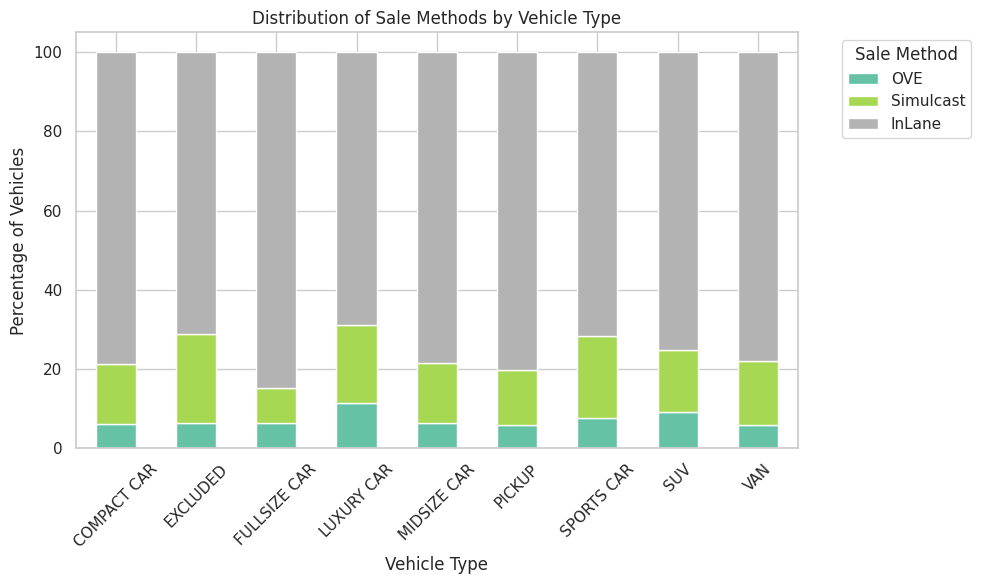

In [117]:
import matplotlib.pyplot as plt

# Step 1: Group by vehicle type and sum sale method columns
sales_by_type = df.groupby("JDPowersCat")[["OVE", "Simulcast", "InLane"]].sum()

# Step 2: Normalize to get row-wise percentages
sales_pct = sales_by_type.div(sales_by_type.sum(axis=1), axis=0) * 100

# Step 3: Plot as stacked bar chart
sales_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="Set2")

# Step 4: Formatting
plt.title("Distribution of Sale Methods by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Percentage of Vehicles")
plt.legend(title="Sale Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Model Building (Classification or Regression)
Use cross-validation (cross_val_score) for stronger evaluation.


Classification:	Logistic Regression, Random Forest, XGBoost
Regression:	Linear Regression, Random Forest Regressor, XGBoost Regressor
(Random Forest/XGBoost – when non-linearity or interaction is suspected)
Evaluate using:
Classification: Accuracy, Precision, Recall, F1, ROC-AUC
Regression: R², RMSE, MAE

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# Improve Model

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

# Model Interpretation
Tools: SHAP, Feature Importance (model.feature_importances_)

Explain:

Which features drive prediction?

How does the model behave under different inputs?



In [ ]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top Features")
plt.show()

In [ ]:
model.feature_importances_